Actual Brownlow Count:
Patrick Cripps: 45
Nick Daicos: 38
Zak Butters: 29
Caleb Serong: 28
Isaac Heeney: 28
Tom Green: 27
Adam Treloar: 26
Matt Rowell: 25
Errol Gulden: 25
Jai Newcombe: 24


Player Rating Votes:
Zak Butters:[0, 0, 0, 0, 2, 0, 0, 3, 2, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 3] - Total:21
Caleb Serong:[0, 0, 3, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 3, 3, 0, 0, 0, 2, 1, 0, 0, 3] - Total:20
Jack Sinclair:[0, 2, 0, 0, 0, 1, 0, 2, 0, 3, 0, 0, 1, 0, 2, 3, 0, 0, 3, 0, 0, 0, 2, 0] - Total:19
Tom Liberatore:[0, 0, 0, 3, 0, 1, 0, 2, 3, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 0, 3, 0, 0, 2] - Total:18
Tim English:[0, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 3, 3, 2, 0, 2, 0, 0] - Total:18
Marcus Bontempelli:[0, 3, 0, 0, 3, 3, 0, 1, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 2, 0, 1, 0, 2, 0] - Total:18
Errol Gulden:[3, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 1, 3, 1, 1, 0, 3, 0, 0, 0, 2] - Total:18
Charlie Curnow:[1, 0, 0, 3, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 3, 0] - Total:17
Tay

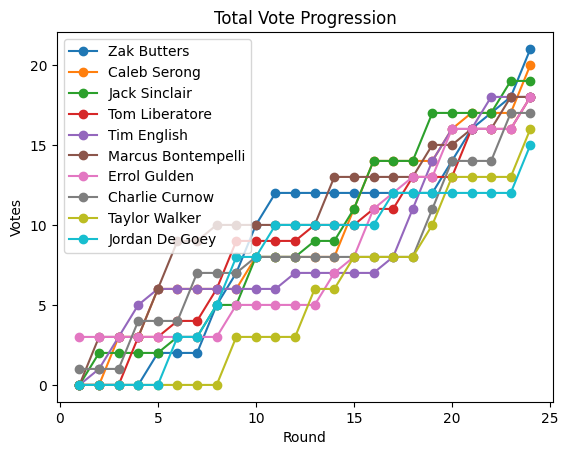

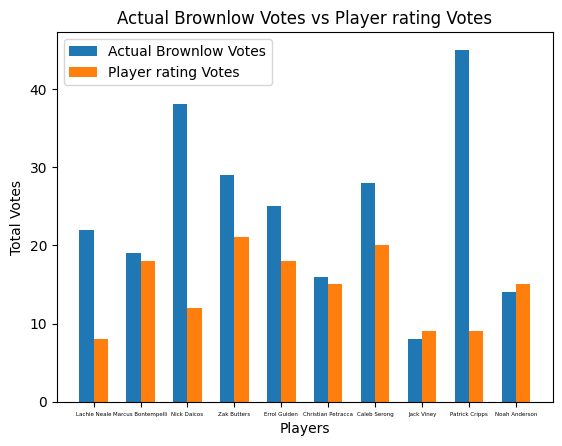

In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import urllib.request
import ssl
import re

# This upcoming function processes the AFL player ratings by round for each individual player and then gives 3 votes to the highest rated player, 
# 2 to the second highest and 1 to the 3rd highest. The rest of the players get 0 votes. These are added on to eachother so the total counts can
# also be calculated. The csv files are from https://www.wheeloratings.com/afl_match_stats.html?ID=20232801
def round_by_round():
    all_votes = []
    for round_number in range(1, 25):
        file_path = f'2023round_data/afl-match-stats-2023-Round{round_number}-All.csv'
        with open(file_path, mode='r') as file:
            csv_reader = csv.DictReader(file)
            round_votes = {}
            row_number = 1
            for row in csv_reader:
                player = row['Player']
                if player:

                    if row_number in [1, 47, 93, 139, 185, 231, 277, 323, 369]:
                        votes = 3
                    elif row_number in [2, 48, 94, 140, 186, 232, 278, 324, 370]:
                        votes = 2
                    elif row_number in [3, 49, 95, 141, 187, 233, 279, 325, 371]:
                        votes = 1
                    else:
                        votes = 0

                    if player in round_votes:
                        round_votes[player] += votes
                    else:
                        round_votes[player] = votes

                row_number += 1

            all_votes.append(round_votes)
    return all_votes

# This upcoming function organises the Brownlow votes for each player into a dictionary, with each player next to their votes that they attain by each round.
def playerratings_votes_dictionary(all_round_votes):
    votes_by_round = {}
    for round_number in range(24):
        round_votes = all_round_votes[round_number]
        for player, votes in round_votes.items():
            if player not in votes_by_round:
                votes_by_round[player] = [0] * 24
            votes_by_round[player][round_number] = votes
    
    return votes_by_round

# This upcoming function sums up the total Brownlow votes for each player across all rounds and returns a dictionary containing each player's total votes.
def sum_pr_votes(votes_by_round):
    total_votes = {}
    for player, votes_list in votes_by_round.items():
        total = sum(votes_list)
        total_votes[player] = total
    
    return total_votes

# This upcoming function creates a graph which tracks the progression of the 10 highest voting players based on their cumulative Brownlow votes as the season goes on
def pr_votes_cumulation_graph(votes_by_round, top_players):
    rounds = range(1, 25) 
    for player in top_players:
        votes = votes_by_round[player]
        cumulative_votes = []
        cumulative_vote_sum = 0
        for i in range(len(votes)):
            cumulative_vote_sum += votes[i]
            cumulative_votes.append(cumulative_vote_sum)
        plt.plot(rounds, cumulative_votes, marker='o', label=player)

    plt.xlabel('Round')
    plt.ylabel('Votes')
    plt.title('Total Vote Progression')
    plt.legend()
    plt.show()

# This upcoming function gets the actual Brownlow Medal votes from footywire.com and returns a dictionary mapping player names to their total amount of votes
def actual_brownlow_votes():
    url = "https://www.footywire.com/afl/footy/brownlow_medal"
    response = urllib.request.urlopen(url, context=ssl._create_unverified_context()).read().decode()
    pattern = re.compile(r'<td height="24" align="left">&nbsp;<a href="[^"]*">(.*?)</a>.*?</td>\s*<td align="left"><a href="[^"]*">.*?</a></td>\s*<td align="center">(\d+)</td>')
    find = pattern.findall(response)
    
    brownlow_data = {}
    for match in find:
        player_name = match[0]
        votes = int(match[1])
        brownlow_data[player_name] = votes
        
    return brownlow_data

# This upcoming function creates a graph that compares the top 10 of the official Brownlow count with their total player rating votes in a bar graph.
def pr_ratings_vs_brownlow_graph(actual_votes, round_data_votes, brownlow_top10):
    brownlow_top10 = ['Lachie Neale', 
                   'Marcus Bontempelli', 
                   'Nick Daicos', 
                   'Zak Butters', 
                   'Errol Gulden', 
                   'Christian Petracca', 
                   'Caleb Serong', 
                   'Jack Viney', 
                   'Patrick Cripps', 
                   'Noah Anderson']
    
    top10 = np.array(range(10))

    plt.bar(top10, [actual_votes[player] for player in brownlow_top10], 0.3, label='Actual Brownlow Votes')
    plt.bar(top10 + 0.3, [round_data_votes[player] for player in brownlow_top10], 0.3, label='Player rating Votes')

    plt.title('Actual Brownlow Votes vs Player rating Votes')
    plt.xlabel('Players')
    plt.ylabel('Total Votes')
    plt.legend()
    plt.xticks(top10 + 0.15, brownlow_top10, fontsize = 4)
    plt.show()


def main():
    brownlow_data = actual_brownlow_votes()
    
    print("Actual Brownlow Count:")
    for player, total_votes in list(brownlow_data.items())[:10]:
        print(f"{player}: {total_votes}")
    
    all_round_votes = round_by_round()
    votes_by_round = playerratings_votes_dictionary(all_round_votes)
    total_votes = sum_pr_votes(votes_by_round)

    brownlow_top10 = ['Lachie Neale', 
                   'Marcus Bontempelli', 
                   'Nick Daicos', 
                   'Zak Butters', 
                   'Errol Gulden', 
                   'Christian Petracca', 
                   'Caleb Serong', 
                   'Jack Viney', 
                   'Patrick Cripps', 
                   'Noah Anderson']

    print("\n\nPlayer Rating Votes:")
    sorted_players_by_pr_votes = sorted(total_votes.items(), key=lambda item: item[1], reverse=True)
    for player, total in sorted_players_by_pr_votes:
        votes = votes_by_round[player]
        print(f"{player}:{votes} - Total:{total}")

    top_players_rating_votes = ['Zak Butters', 'Caleb Serong', 'Jack Sinclair', 'Tom Liberatore', 'Tim English', 'Marcus Bontempelli', 'Errol Gulden', 'Charlie Curnow', 'Taylor Walker', 'Jordan De Goey']
    pr_votes_cumulation_graph(votes_by_round, top_players_rating_votes)

    top_10_actual_votes = {player: brownlow_data[player] for player in brownlow_top10 if player in brownlow_data}
    pr_ratings_vs_brownlow_graph(top_10_actual_votes, total_votes, brownlow_top10)

if __name__ == "__main__":
    main()
